In [19]:
import pandas as pd

In [20]:
df=pd.read_csv(r"D:\ibm project\Churn_Modelling.csv")

In [21]:
import numpy as np

In [22]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

In [29]:
import seaborn as sns

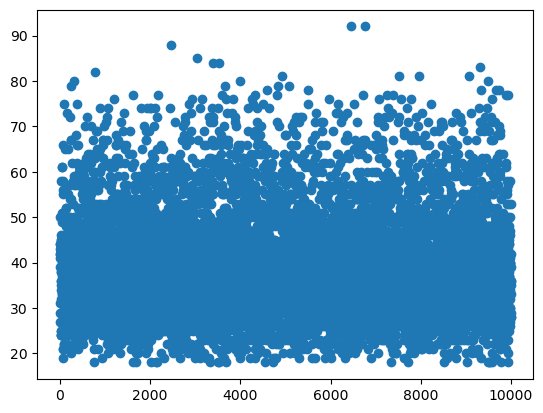

In [30]:
plt.scatter(df.index,df['Age'])
plt.show()

C:\Users\bhagyalakshmi\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

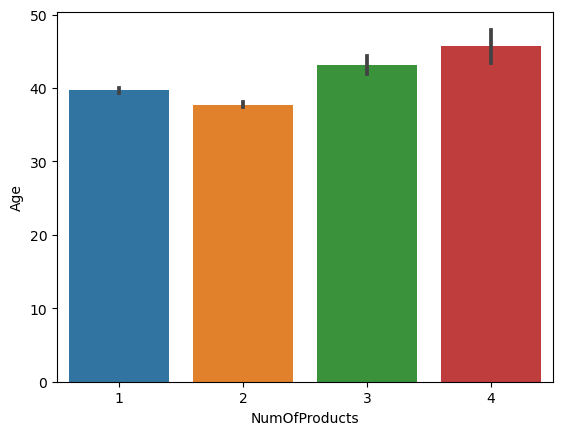

In [31]:
sns.barplot(df["NumOfProducts"],df["Age"])


C:\Users\bhagyalakshmi\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='NumOfProducts'>

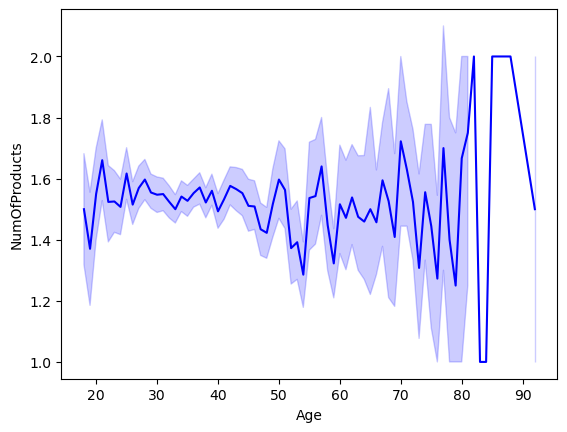

In [32]:
sns.lineplot(df["Age"],df["NumOfProducts"], color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


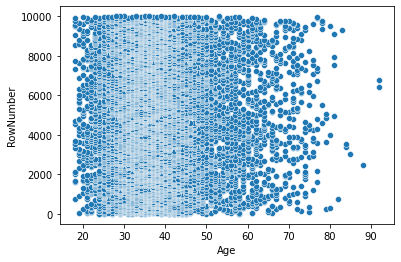

In [15]:
sns.scatterplot(df['Age'], df['RowNumber'])


<AxesSubplot:xlabel='Age', ylabel='Tenure'>

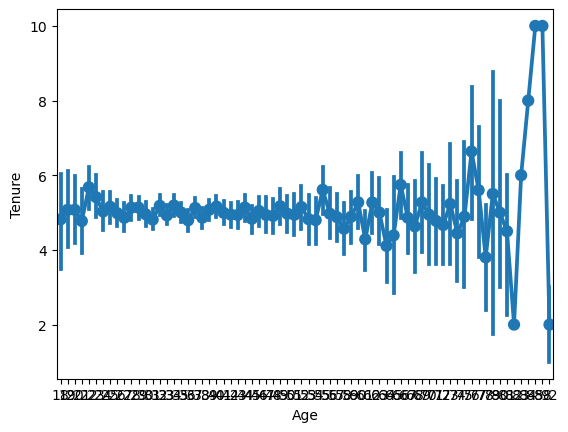

In [34]:
sns.pointplot(x='Age',y='Tenure',data=df)


C:\Users\bhagyalakshmi\anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Tenure'>

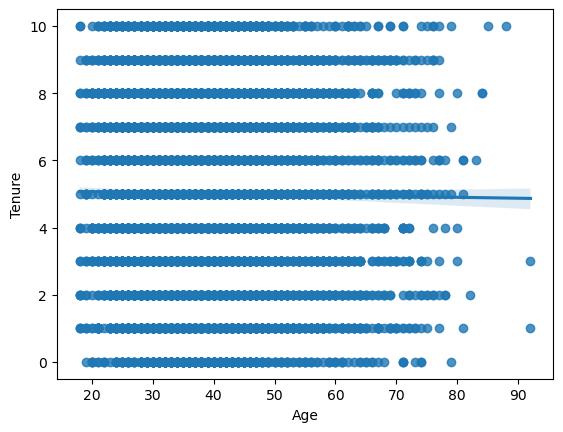

In [37]:
sns.regplot(df['Age'],df['Tenure'])


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

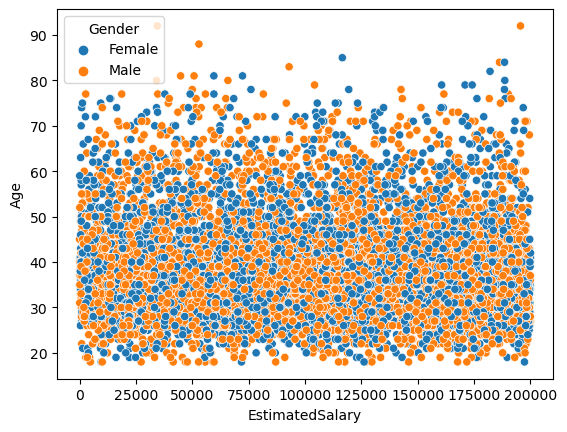

In [36]:
sns.scatterplot(x=df['EstimatedSalary'],y=df['Age'],hue=df["Gender"])


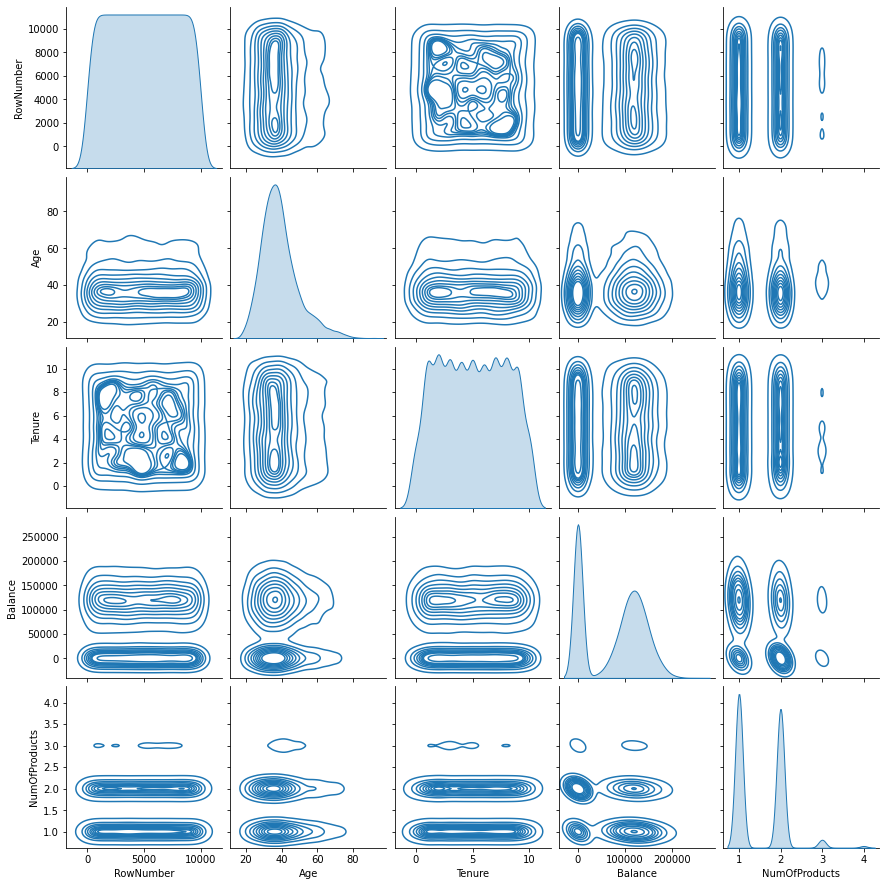

In [19]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]],kind="kde")


In [38]:
df.isnull().any()


RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [39]:
cust_dataset = pd.DataFrame({
    "a": [1,2,3],
    "b": [4,None,None],
    "c": [5,6,None]
})
cust_dataset

,a,b,c
0,1,4.0,5.0
1,2,NaN,6.0
2,3,NaN,NaN


In [40]:
cust_dataset.isnull().any()


a    False
b     True
c     True
dtype: bool

In [41]:
mean_values = cust_dataset.mean()
cust_dataset.fillna(mean_values, inplace=True)
cust_dataset

,a,b,c
0,1,4.0,5.0
1,2,4.0,6.0
2,3,4.0,5.5


<AxesSubplot:xlabel='Age'>

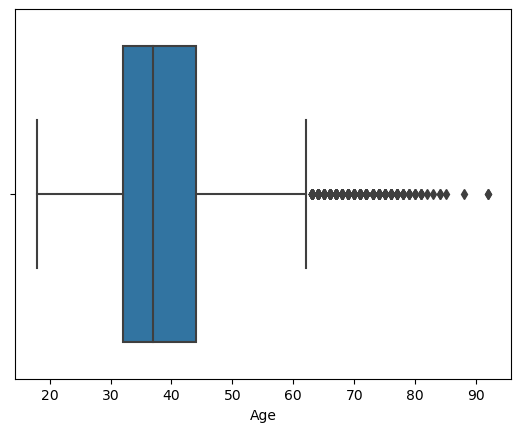

In [42]:
sns.boxplot(x=df['Age'])


In [43]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
iqr

12.0

<AxesSubplot:xlabel='Age'>

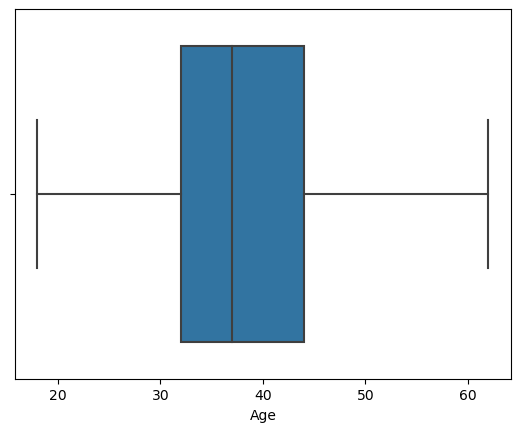

In [44]:
df.loc[df['Age'] < q1 - 1.5*iqr, 'Age'] = q1
df.loc[df['Age'] > q3 + 1.5*iqr, 'Age'] = q3
sns.boxplot(x=df['Age'])

In [45]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df["Geography"].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [47]:
surnames = df["Surname"].unique()
surname_encoding = {}
for i in range(len(surnames)):
  surname_encoding[surnames[i]] = i
len(surname_encoding)

2932

In [48]:
df["Geography"].replace({"France":0,"Spain":1,"Germany":3}, inplace=True)
df["Gender"].replace({"Female":0,"Male":1}, inplace=True)
df["Surname"].replace(surname_encoding, inplace=True)

In [49]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [51]:
y = df['Exited']
X = df.drop(columns=['Exited'], axis=1)

In [52]:
X.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10


In [53]:
column_name = X.columns


In [54]:
X = pd.DataFrame(X, columns =column_name)
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10
